<a href="https://colab.research.google.com/github/jdmartinezrs/incomesAndBillsProject/blob/main/Mision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Aca comieza dt

In [5]:
#Dataset de mantenimiento
import pandas as pd
dt = pd.read_excel("/content/drive/MyDrive/datasets mision1/mantenimiento.xlsm")
dt.shape

(41, 18)

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
dt = pd.read_excel("/content/drive/MyDrive/datasets mision1/mantenimiento.xlsm", header=5)

In [9]:
print(dt.head(2))

  Fecha  ITEM CODIGO DE EQUIPO Tipo de Vehiculo fecha de revision  \
0   NaT   1.0  VE-DT-CH-XMD284     CARRO TANQUE        2025-05-23   
1   NaT   2.0  VE-DT-FL-XMD588      DOBLETROQUE        2025-05-23   

   Km/ Hr Plan Fecha Ult Pre-Operacional  Dias Pend  Ult Km/Hr  Km/Hr Cambio  \
0      10000.0                2025-05-20        3.0   320832.0      316580.0   
1      10000.0                2023-09-21      610.0   209543.0      199850.0   

  Fecha Cambio Fecha Prox Cambio Unnamed: 12  Km/Hr Proyectada  Km/Hr Pend  \
0   2024-06-21        2025-01-17  2025-08-15          326580.0      5748.0   
1   2023-07-11               NaT         NaT          209850.0       307.0   

   Progreso  Unnamed: 16 Observaciones   
0    0.5748        57.48          57.48  
1    0.0307          NaN            NaN  


In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer that replaces NaN with the mean of the column
# You can choose other strategies like 'median' or 'most_frequent'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the data and transform the columns
dt['Km/Hr Pend'] = imputer.fit_transform(dt[['Km/Hr Pend']])
dt['Ult Km/Hr'] = imputer.fit_transform(dt[['Ult Km/Hr']])

# Now define y and x using the imputed data
y = dt['Km/Hr Pend'].values.reshape(-1, 1)
x = dt['Ult Km/Hr'].values.reshape(-1, 1)

# Proceed with your LinearRegression model
model = LinearRegression()
model.fit(x, y)

# Print coefficients, make predictions, etc.
print("Coeficiente:", model.coef_)
print("Intercepción:", model.intercept_)

Coeficiente: [[0.00312893]]
Intercepción: [5427.17926385]


**Coeficiente: [[0.00312893]]**

Este valor (0.00312893) representa la pendiente de la línea de regresión.
Significa que, por cada aumento de una unidad en Ult Km/Hr, se espera un aumento de aproximadamente 0.00312893 unidades en Km/Hr Pend.
En el contexto de tu data, esto sugiere una relación lineal positiva, aunque pequeña. A medida que los kilómetros/horas registrados (Ult Km/Hr) aumentan, los kilómetros/horas pendientes (Km/Hr Pend) tienden a aumentar ligeramente.

**Intercepción: [5427.17926385]**

Este valor (5427.17926385) representa el punto donde la línea de regresión cruza el eje Y (cuando x es igual a 0).
En este caso, cuando Ult Km/Hr es 0, se espera que Km/Hr Pend sea aproximadamente 5427.18.
Sin embargo, es importante ser cauteloso con la interpretación de la intercepción si un valor de Ult Km/Hr de 0 no tiene sentido en el contexto de tus datos (por ejemplo, si nunca tienes un vehículo con 0 Kilómetros/Horas registrados). A veces, la intercepción es más un ajuste matemático para la línea de regresión.

In [11]:
# Define the coefficients and intercept from your model
coeficiente = 0.00312893
intercepcion = 5427.17926385

In [21]:
# Define a variable for the input value (Ult Km/Hr)
# Replace 'some_ult_km_hr_value' with the actual value you want to predict for
ult_km_hr_value = 10000  # Example value

# Calculate the predicted Km/Hr Pend using the equation
km_hr_pend_predicho = (coeficiente * ult_km_hr_value) + intercepcion

# Print the predicted value
print("Km/Hr Pend predicho:", km_hr_pend_predicho)

Km/Hr Pend predicho: 5458.4685638500005


El resultado Km/Hr Pend predicho: 6365.85826385 significa que, según tu modelo de regresión lineal, para un vehículo con 300,000 Kilómetros/Horas registrados (Ult Km/Hr), la cantidad esperada de Kilómetros/Horas pendientes (Km/Hr Pend) es aproximadamente 6365.86.

Contexto: La interpretación de este valor debe hacerse dentro del contexto de tus datos y lo que representan Km/Hr Pend y Ult Km/Hr. Si Km/Hr Pend indica cuánto falta para un próximo mantenimiento, entonces la predicción sugiere que un vehículo con 300,000 Km/Hr tiene aproximadamente 6365.86 Km/Hr restantes antes de su próximo mantenimiento.

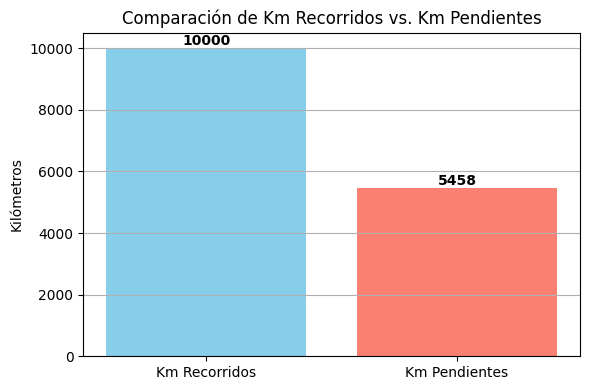

In [22]:
import matplotlib.pyplot as plt

# Datos para la gráfica
labels = ['Km Recorridos', 'Km Pendientes']
values = [ult_km_hr_value, km_hr_pend_predicho]

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])

# Agregar etiquetas
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

# Mostrar los valores encima de las barras
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
